# Energy Consumption With XGBRegressor

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xg

In [2]:
import opendatasets

In [3]:
df=pd.read_csv(r'C:\Users\MOTIRAM SINGH\Desktop\example file\PJME_hourly.csv')

#### Data Processing

In [4]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [5]:
# Making the 'DateTime' column the index
df=df.set_index('Datetime')

In [6]:
df.head(10)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
2002-12-31 06:00:00,26222.0
2002-12-31 07:00:00,28702.0
2002-12-31 08:00:00,30698.0
2002-12-31 09:00:00,31800.0


In [7]:
df.isna().sum()

PJME_MW    0
dtype: int64

<AxesSubplot:xlabel='Datetime'>

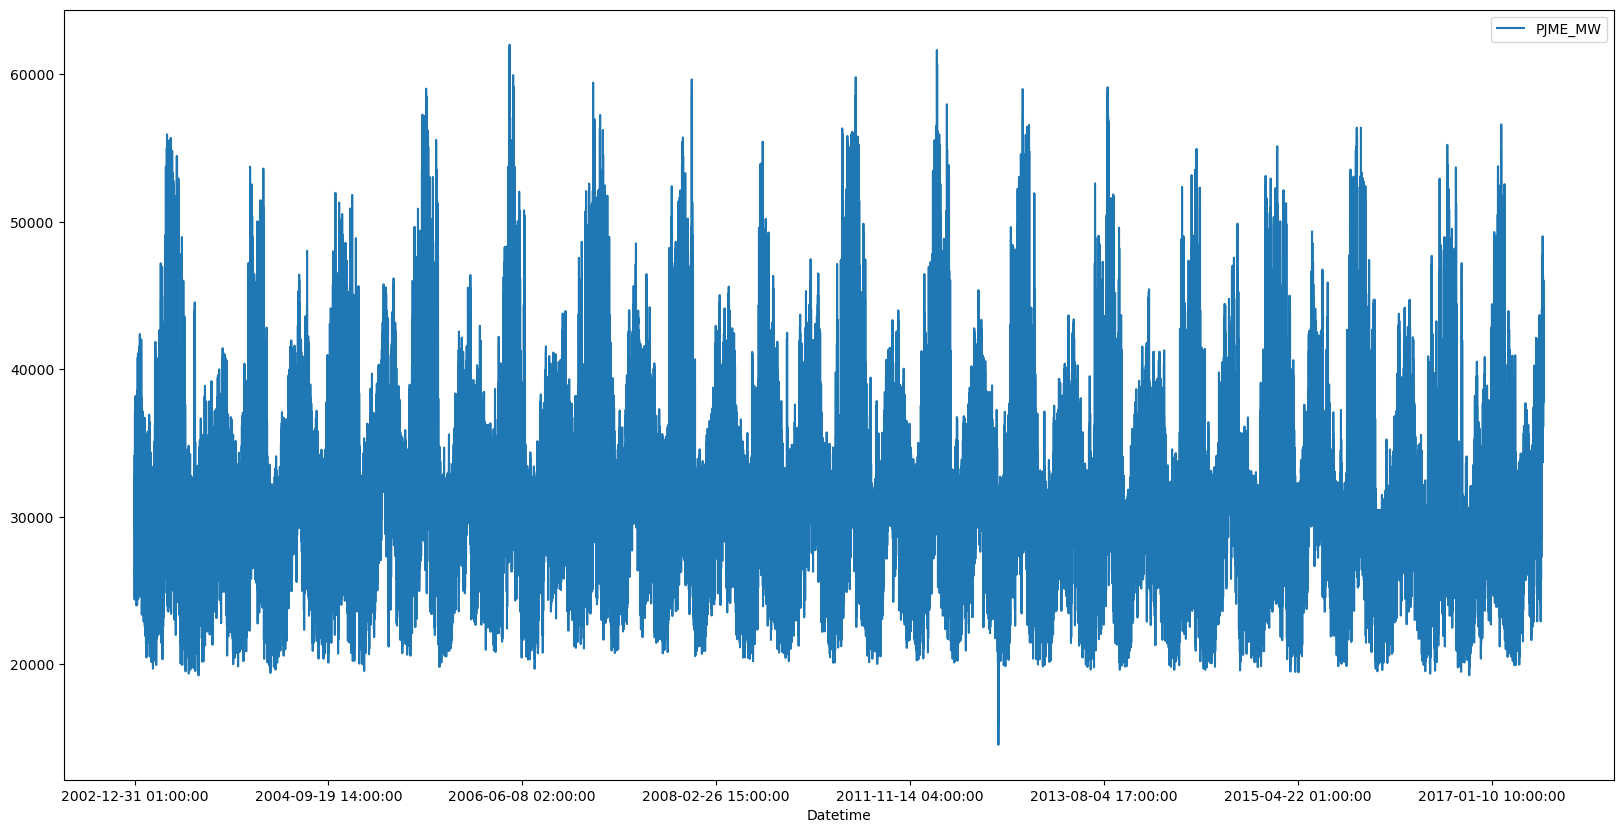

In [8]:
# It's the total energy distribution from 2002 to 2018
df.plot(figsize=(20,10))

In [9]:
# Making it a datatime value so it can be easy to access the year,moth,hour etc.
df.index=pd.to_datetime(df.index)

<AxesSubplot:xlabel='Datetime'>

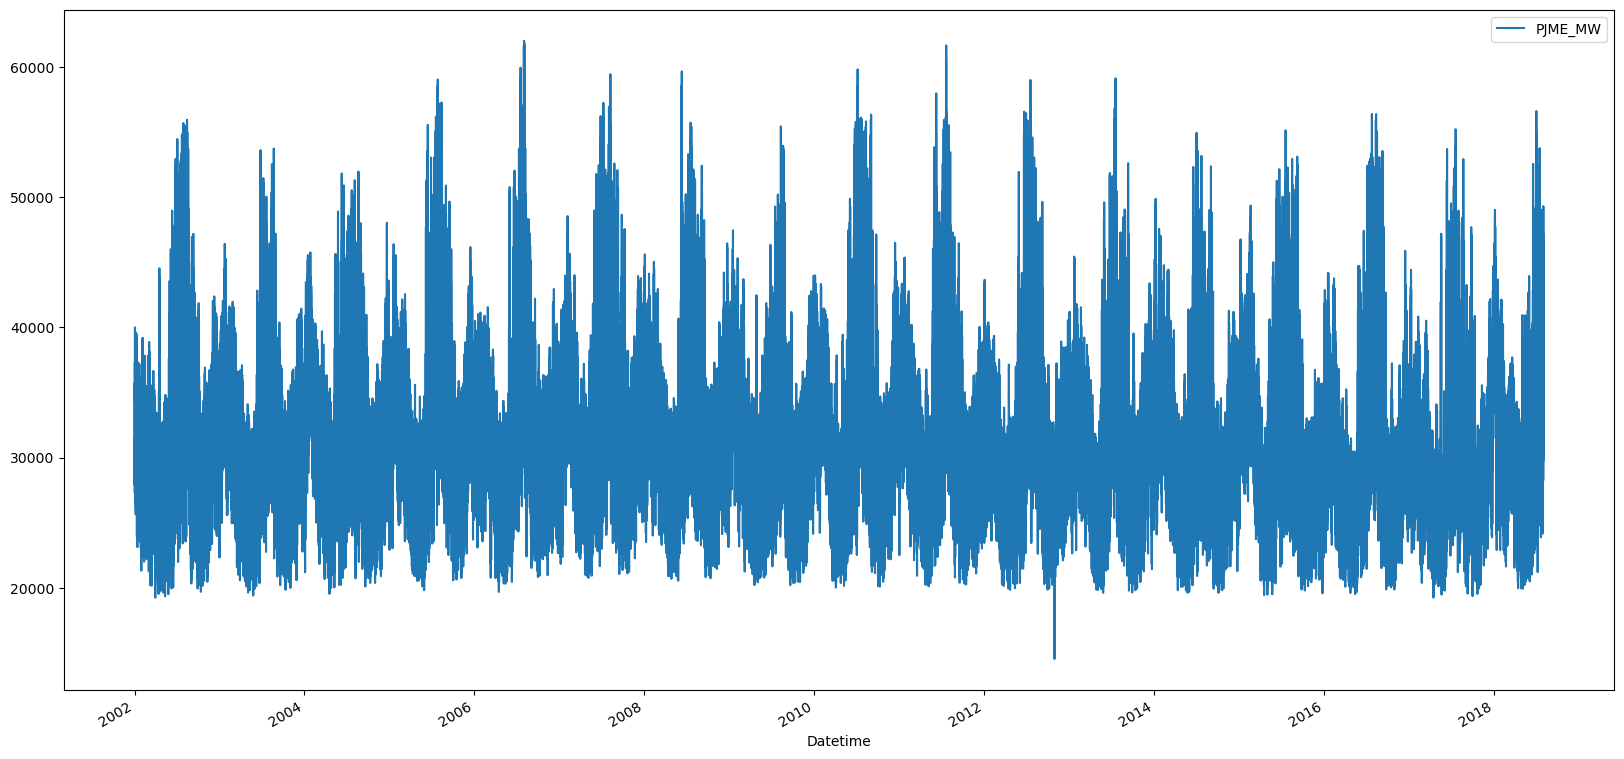

In [10]:
df.plot(figsize=(20,10))

In [11]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [12]:
# Manually making training and testing dataset from the dataset
train=df.loc[df.index<'01-01-2014']
test=df.loc[df.index>='01-01-2014']

In [13]:
train.shape

(105166, 1)

In [14]:
test.shape

(40200, 1)

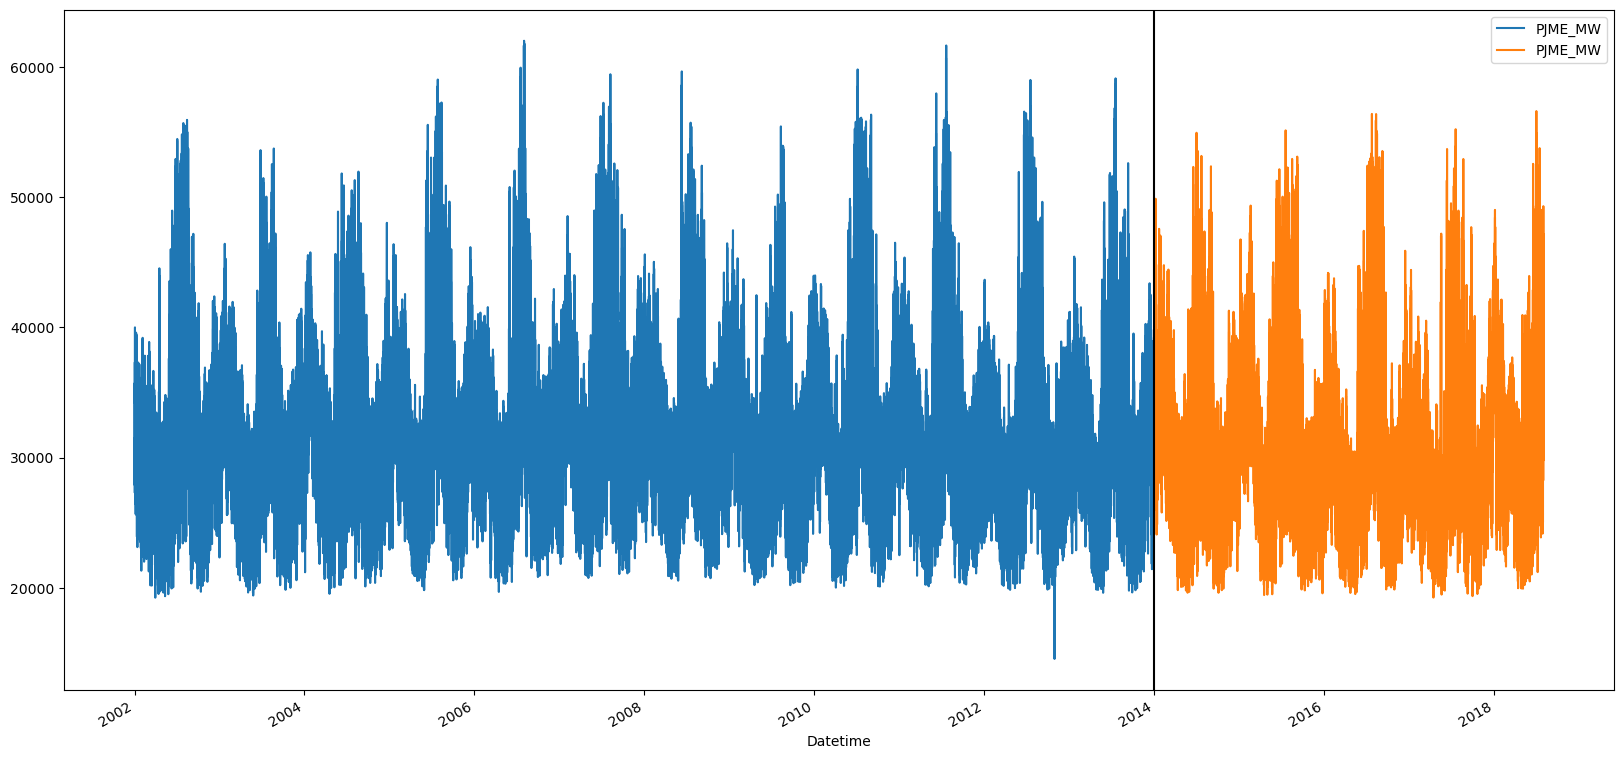

In [15]:
fig,ax=plt.subplots(figsize=(20,10))
train.plot(ax=ax,label='Training set')
test.plot(ax=ax,label='test set')
ax.axvline('01-01-2014',color='black') # this vertical line will show you from wehre the dataset is devided into training and testing dataset

In [16]:
# Making additional column from the index
df['Hour']=df.index.hour
df['day_of_week']=df.index.dayofweek
df['year']=df.index.year
df['month']=df.index.month
df['quater']=df.index.quarter
df['day_of_year']=df.index.dayofyear

In [17]:
df.head(30)

,PJME_MW,Hour,day_of_week,year,month,quater,day_of_year
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,2002,12,4,365
2002-12-31 02:00:00,25147.0,2,1,2002,12,4,365
2002-12-31 03:00:00,24574.0,3,1,2002,12,4,365
2002-12-31 04:00:00,24393.0,4,1,2002,12,4,365
2002-12-31 05:00:00,24860.0,5,1,2002,12,4,365
2002-12-31 06:00:00,26222.0,6,1,2002,12,4,365
2002-12-31 07:00:00,28702.0,7,1,2002,12,4,365
2002-12-31 08:00:00,30698.0,8,1,2002,12,4,365
2002-12-31 09:00:00,31800.0,9,1,2002,12,4,365


Text(0, 0.5, 'Energy consumption')

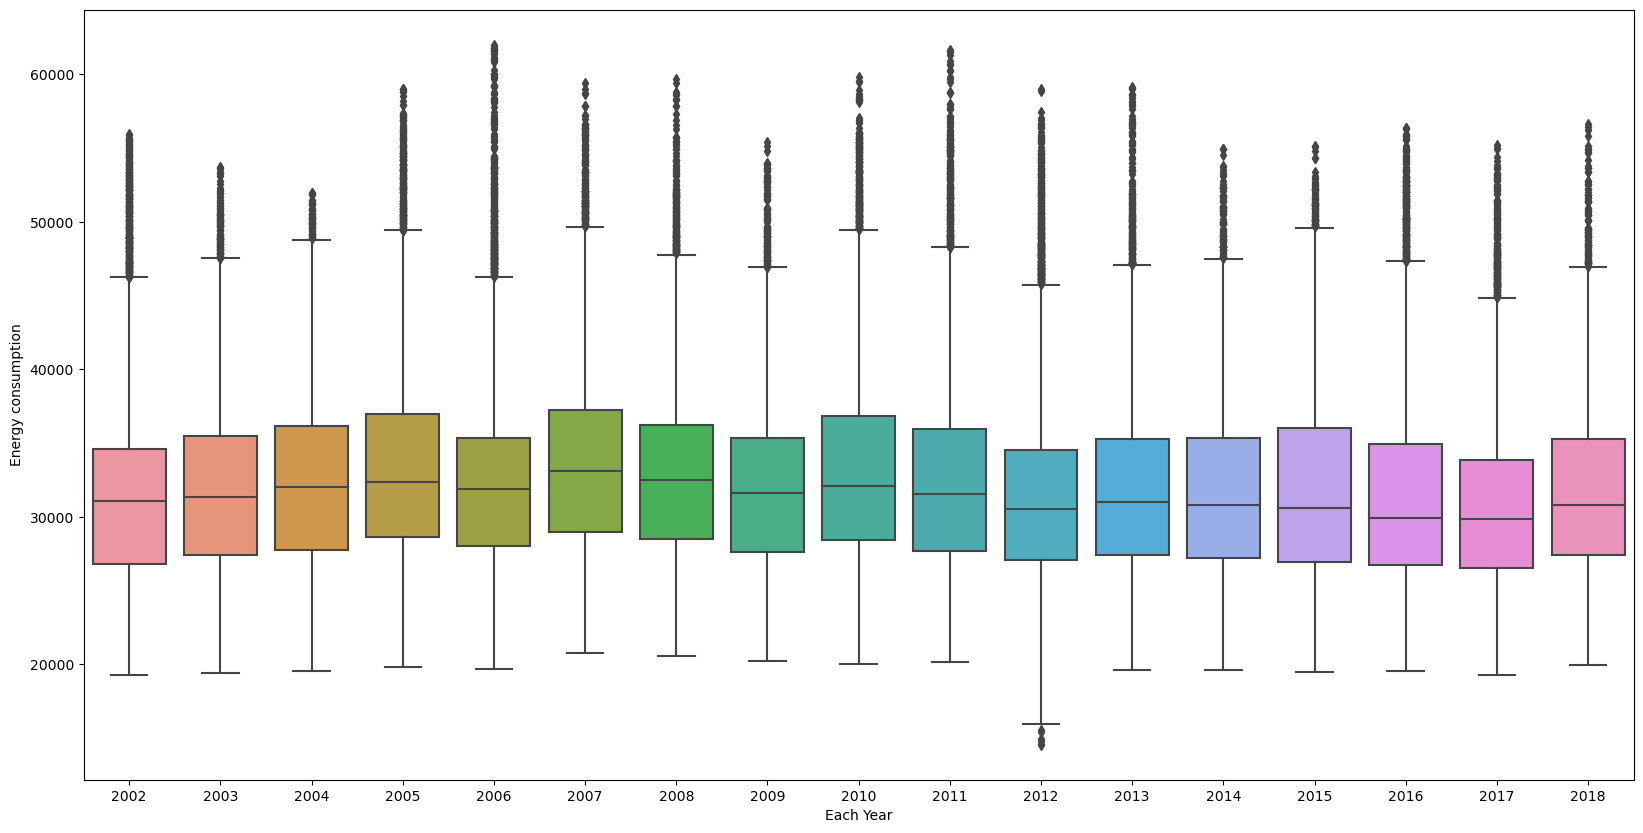

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='year',y='PJME_MW')
plt.xlabel('Each Year')
plt.ylabel('Energy consumption')

<AxesSubplot:xlabel='Hour', ylabel='PJME_MW'>

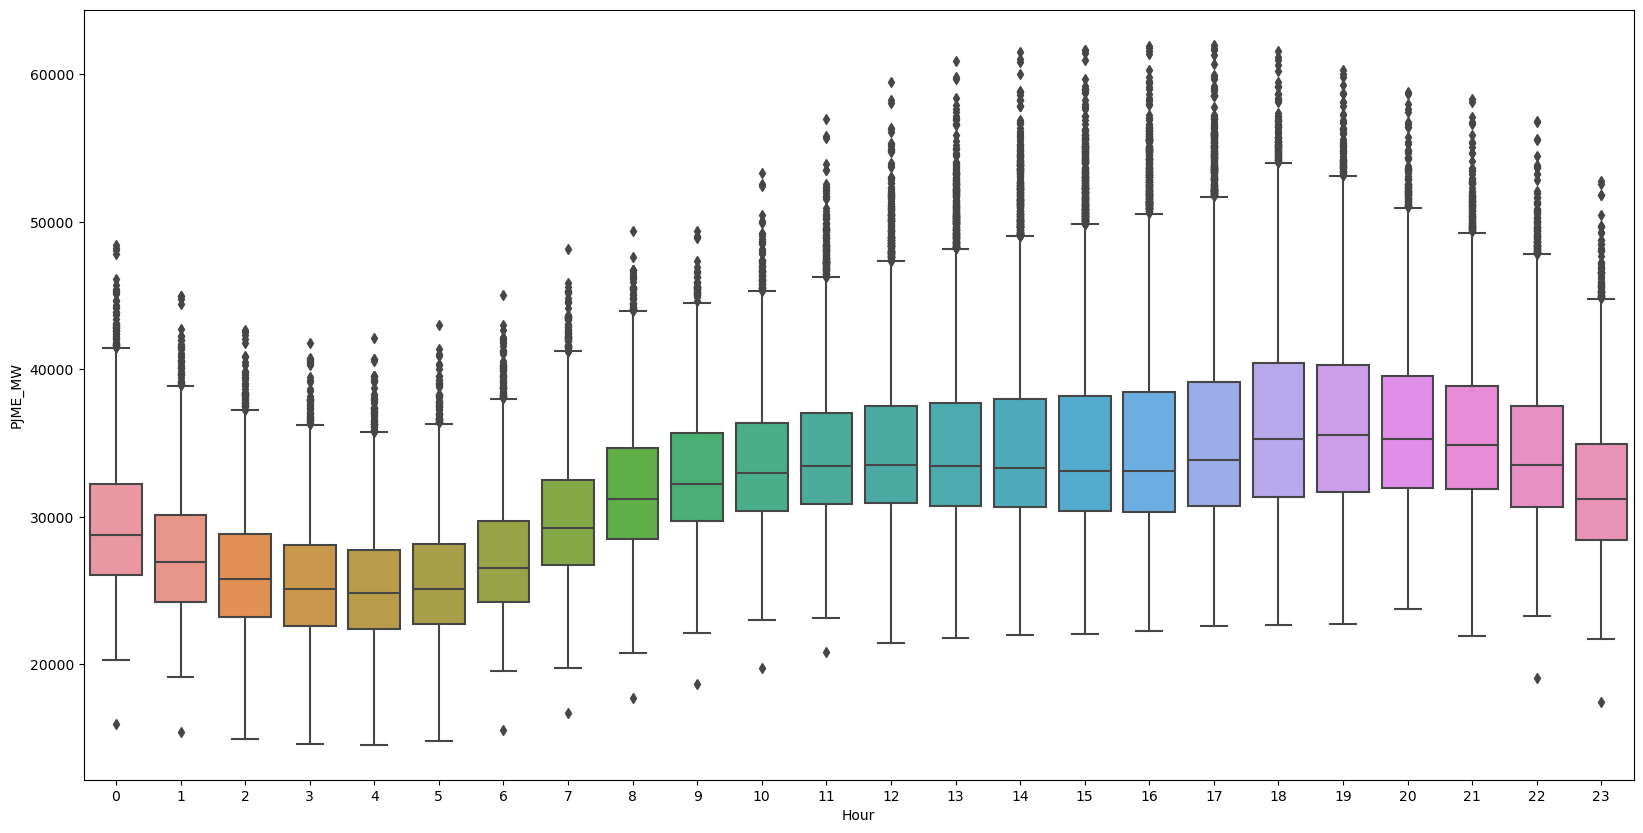

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Hour',y='PJME_MW')

<AxesSubplot:xlabel='month', ylabel='PJME_MW'>

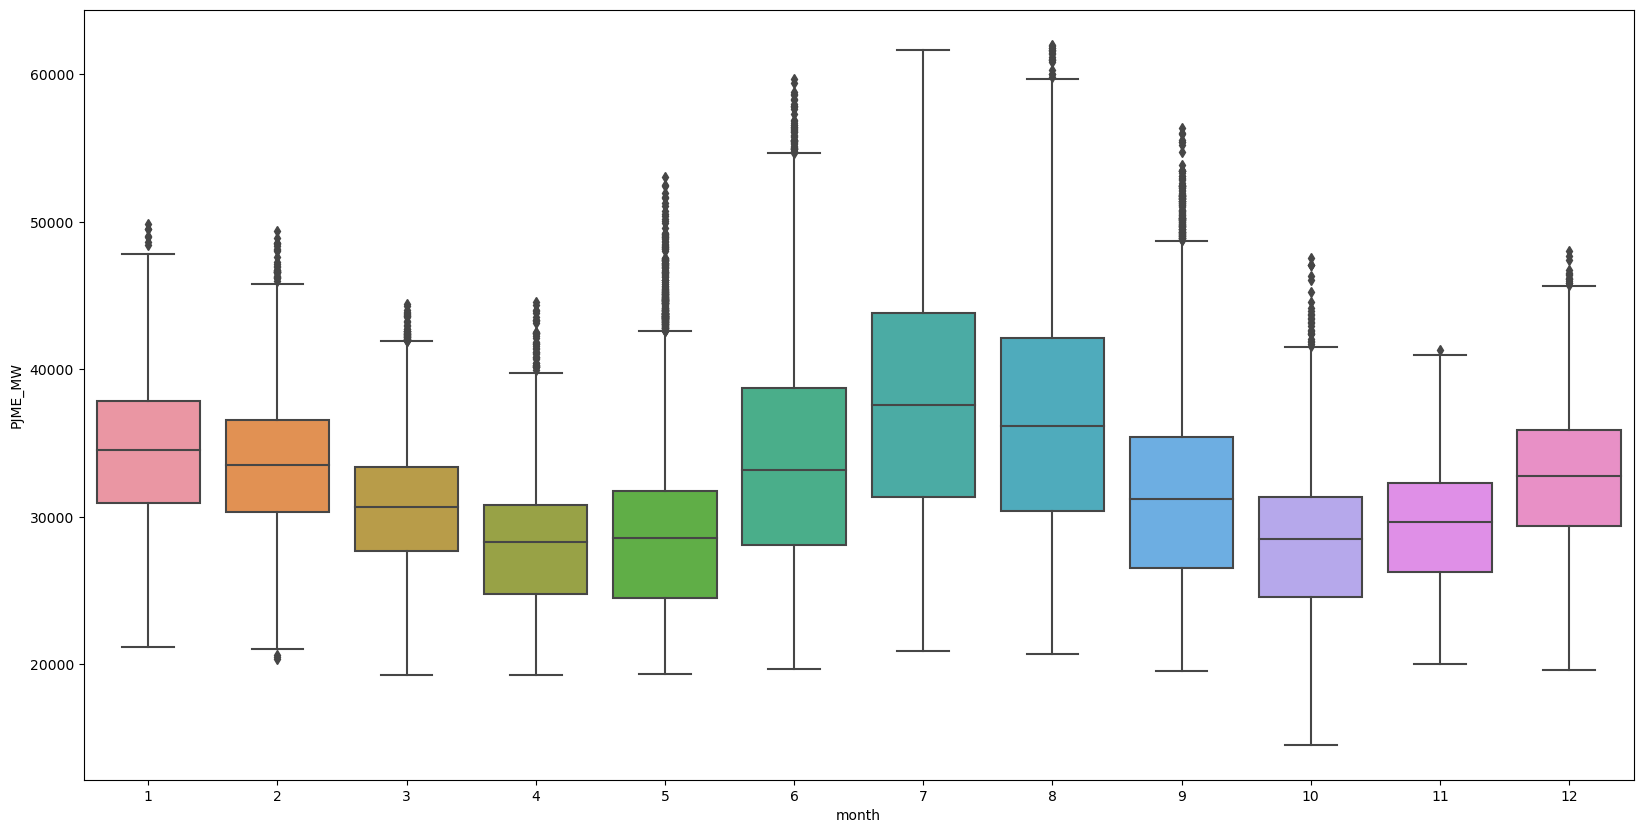

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='month',y='PJME_MW')

In [21]:
train.head(10)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
2002-12-31 06:00:00,26222.0
2002-12-31 07:00:00,28702.0
2002-12-31 08:00:00,30698.0
2002-12-31 09:00:00,31800.0


In [22]:
test.tail(10)

,PJME_MW
Datetime,
2018-01-01 15:00:00,38737.0
2018-01-01 16:00:00,39337.0
2018-01-01 17:00:00,41213.0
2018-01-01 18:00:00,44147.0
2018-01-01 19:00:00,44343.0
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0


In [23]:
df.columns

Index(['PJME_MW', 'Hour', 'day_of_week', 'year', 'month', 'quater',
       'day_of_year'],
      dtype='object')

In [24]:
# devide the training and testing dataset into predictor and predicted column
X_train=df[['Hour', 'day_of_week', 'year', 'month', 'quater',
       'day_of_year']]
X_test=df[['Hour', 'day_of_week', 'year', 'month', 'quater',
       'day_of_year']]
y_train=df['PJME_MW']
y_test=df['PJME_MW']

In [25]:
# Make the model with 100 trees and will stop after 50 rounds
model=xg.XGBRegressor(n_estimators=100,early_stopping_rounds=50)

In [26]:
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],verbose=True)

[0]	validation_0-rmse:23058.62372	validation_1-rmse:23058.62372
[1]	validation_0-rmse:16340.48783	validation_1-rmse:16340.48783
[2]	validation_0-rmse:11698.21765	validation_1-rmse:11698.21765
[3]	validation_0-rmse:8538.65933	validation_1-rmse:8538.65933
[4]	validation_0-rmse:6420.96543	validation_1-rmse:6420.96543
[5]	validation_0-rmse:5060.75027	validation_1-rmse:5060.75027
[6]	validation_0-rmse:4207.42388	validation_1-rmse:4207.42388
[7]	validation_0-rmse:3696.41257	validation_1-rmse:3696.41257
[8]	validation_0-rmse:3409.11994	validation_1-rmse:3409.11994
[9]	validation_0-rmse:3228.88567	validation_1-rmse:3228.88567
[10]	validation_0-rmse:3129.05950	validation_1-rmse:3129.05950
[11]	validation_0-rmse:3049.68011	validation_1-rmse:3049.68011
[12]	validation_0-rmse:2958.72040	validation_1-rmse:2958.72040
[13]	validation_0-rmse:2932.88908	validation_1-rmse:2932.88908
[14]	validation_0-rmse:2854.28921	validation_1-rmse:2854.28921
[15]	validation_0-rmse:2824.12936	validation_1-rmse:2824.12

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
pred=model.predict(X_test)

In [28]:
df1=pd.DataFrame(pred)
df1

,0
0,26479.939453
1,25523.546875
2,25253.996094
3,25212.000000
4,25701.664062
...,...
145361,44549.367188
145362,44099.253906
145363,42518.824219
145364,39969.382812


In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
np.sqrt(mean_squared_error(y_test,pred))

1825.7905395189375